# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 46kB/s  eta 0:00:01    75% |████████████████████████▏       | 11.0MB 29.4MB/s eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

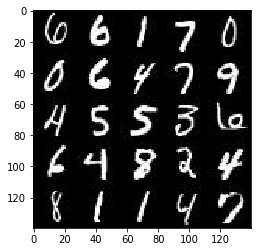

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

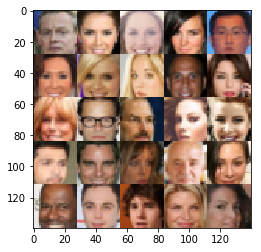

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='inputs_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return (inputs_real, inputs_z, learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [11]:
def discriminator(images, reuse=False, alpha=0.2, stddev=0.02):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # Layer 1 in: 28x28xchannel_dim
        layer_1 = tf.layers.conv2d(images, 32, 5, 2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        layer_1 = tf.maximum(alpha * layer_1, layer_1)
        # Layer 1 out: 14x14x32
        
        # Layer 2 in: 14x14x32
        layer_2 = tf.layers.conv2d(layer_1, 64, 5, 2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        layer_2 = tf.layers.batch_normalization(layer_2, training=True)
        layer_2 = tf.maximum(alpha * layer_2, layer_2)
        # Layer 2 out: 7x7x64
        
        # Layer 3 in: 7x7x64
        layer_3 = tf.layers.conv2d(layer_2, 128, 5, 2, padding='same',  kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        layer_3 = tf.layers.batch_normalization(layer_3, training=True)
        layer_3 = tf.maximum(alpha * layer_3, layer_3)
        # Layer 3 out: 4x4x128
        
        #Layer 4 in: 4x4x128
        layer_4 = tf.layers.conv2d(layer_3, 256, 5, 2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        layer_4 = tf.layers.batch_normalization(layer_4, training=True)
        layer_4 = tf.maximum(alpha * layer_4, layer_4)
        # Layer 4 out: 2x2x256
        
        flattened = tf.reshape(layer_4, (-1, 2*2*256))
        logits = tf.layers.dense(flattened, 1, kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        output = tf.sigmoid(logits)
        
        return output, logits
        

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [12]:
def generator(z, out_channel_dim, is_train=True,alpha=0.2, stddev=0.02):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        # Layer 1 in: 7x7x256
        layer_1 = tf.layers.dense(z, 4 * 4 * 512)
        layer_1 = tf.reshape(layer_1, (-1, 4, 4, 512))
        layer_1 = tf.layers.batch_normalization(layer_1, training=is_train)
        layer_1 = tf.maximum(alpha * layer_1, layer_1)
        # Layer 1 out: 4x4x512
        
        layer_2 = tf.layers.conv2d_transpose(layer_1, 128, 4, 1, padding='valid', kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        layer_2 = tf.layers.batch_normalization(layer_2, training=is_train)
        layer_2 = tf.maximum(alpha * layer_2, layer_2)
        # Layer 2 out: 8x8x128
        
        layer_3 = tf.layers.conv2d_transpose(layer_2, 64, 5, 2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        layer_3 = tf.layers.batch_normalization(layer_3, training=is_train)
        layer_3 = tf.maximum(alpha * layer_3, layer_3)
        # Layer 3 out: 16x16x64
        
        layer_4 = tf.layers.conv2d_transpose(layer_3, 32, 5, 2, padding='same',kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        layer_4 = tf.layers.batch_normalization(layer_4, training=is_train)
        layer_4 = tf.maximum(alpha * layer_4, layer_4)
        # Layer 4 out: 32x32x32
        
        logits = tf.layers.conv2d_transpose(layer_4, out_channel_dim, 3, 1, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        output = tf.tanh(logits)
        
        return output
        

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [14]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss,g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [15]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    train_vars = tf.trainable_variables()
    dis_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    gen_vars = [var for var in train_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    gen_updates = [op for op in update_ops if op.name.startswith('generator')]
    
    with tf.control_dependencies(gen_updates):
        dis_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=dis_vars)
        gen_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
    
        return dis_train_ops, gen_train_ops


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [17]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_channels = data_shape
    
    input_real, input_z, in_learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    dis_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    dis_ops, gen_ops = model_opt(dis_loss, gen_loss, learning_rate, beta1)
    
    steps = 0
    
    print_every = 10
    show_every = 100
    
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                steps += 1
                
                batch_images *= 2
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(dis_ops, feed_dict={ input_real: batch_images, input_z: batch_z, in_learning_rate: learning_rate })
                _ = sess.run(gen_ops, feed_dict={ input_z: batch_z, in_learning_rate: learning_rate })
                
                if steps % print_every == 0:
                    dis_loss_train = dis_loss.eval({
                        input_z: batch_z,
                        input_real: batch_images
                    })
                    gen_loss_train = gen_loss.eval({
                        input_z: batch_z
                    })
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                         "Discriminator Loss: {:.4f}...".format(dis_loss_train),
                         "Generator Loss: {:.4f}".format(gen_loss_train))
                    
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 3.0010... Generator Loss: 0.0569
Epoch 1/2... Discriminator Loss: 1.2430... Generator Loss: 0.9837
Epoch 1/2... Discriminator Loss: 0.9650... Generator Loss: 0.6393
Epoch 1/2... Discriminator Loss: 1.4280... Generator Loss: 1.3873
Epoch 1/2... Discriminator Loss: 0.3920... Generator Loss: 1.7490
Epoch 1/2... Discriminator Loss: 0.3958... Generator Loss: 1.4252
Epoch 1/2... Discriminator Loss: 0.5552... Generator Loss: 3.7043
Epoch 1/2... Discriminator Loss: 0.3516... Generator Loss: 1.6532
Epoch 1/2... Discriminator Loss: 0.7672... Generator Loss: 1.1444
Epoch 1/2... Discriminator Loss: 0.8180... Generator Loss: 1.3771


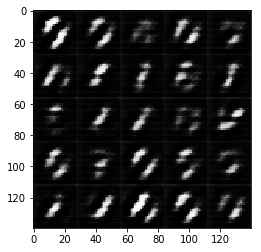

Epoch 1/2... Discriminator Loss: 0.7799... Generator Loss: 1.0599
Epoch 1/2... Discriminator Loss: 0.4744... Generator Loss: 1.8481
Epoch 1/2... Discriminator Loss: 1.0276... Generator Loss: 1.7019
Epoch 1/2... Discriminator Loss: 1.5055... Generator Loss: 0.3540
Epoch 1/2... Discriminator Loss: 0.7587... Generator Loss: 0.9093
Epoch 1/2... Discriminator Loss: 0.8572... Generator Loss: 1.2280
Epoch 1/2... Discriminator Loss: 0.7915... Generator Loss: 2.3371
Epoch 1/2... Discriminator Loss: 0.9679... Generator Loss: 0.9912
Epoch 1/2... Discriminator Loss: 0.6059... Generator Loss: 1.2280
Epoch 1/2... Discriminator Loss: 0.9950... Generator Loss: 0.8937


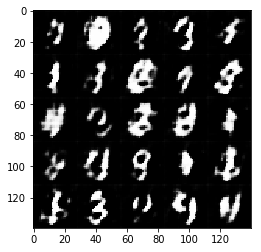

Epoch 1/2... Discriminator Loss: 1.0309... Generator Loss: 0.8213
Epoch 1/2... Discriminator Loss: 0.9804... Generator Loss: 1.0451
Epoch 1/2... Discriminator Loss: 1.2324... Generator Loss: 1.1701
Epoch 1/2... Discriminator Loss: 1.0513... Generator Loss: 0.9887
Epoch 1/2... Discriminator Loss: 1.1009... Generator Loss: 0.6492
Epoch 1/2... Discriminator Loss: 0.9524... Generator Loss: 1.1516
Epoch 1/2... Discriminator Loss: 0.9442... Generator Loss: 0.9188
Epoch 1/2... Discriminator Loss: 0.8991... Generator Loss: 0.7593
Epoch 1/2... Discriminator Loss: 1.5325... Generator Loss: 0.3572
Epoch 1/2... Discriminator Loss: 0.9707... Generator Loss: 0.9548


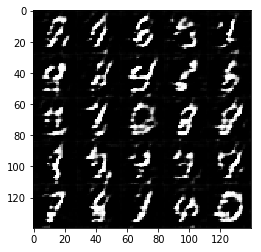

Epoch 1/2... Discriminator Loss: 1.0246... Generator Loss: 0.8510
Epoch 1/2... Discriminator Loss: 0.9251... Generator Loss: 0.9009
Epoch 1/2... Discriminator Loss: 0.8729... Generator Loss: 0.8897
Epoch 1/2... Discriminator Loss: 0.7467... Generator Loss: 1.0808
Epoch 1/2... Discriminator Loss: 1.1995... Generator Loss: 0.5556
Epoch 1/2... Discriminator Loss: 1.0821... Generator Loss: 0.6766
Epoch 1/2... Discriminator Loss: 1.3713... Generator Loss: 0.6130
Epoch 1/2... Discriminator Loss: 1.3865... Generator Loss: 0.3802
Epoch 1/2... Discriminator Loss: 1.0063... Generator Loss: 1.8456
Epoch 1/2... Discriminator Loss: 1.8212... Generator Loss: 0.3208


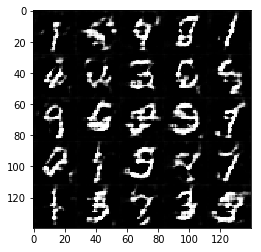

Epoch 1/2... Discriminator Loss: 0.9371... Generator Loss: 0.8666
Epoch 1/2... Discriminator Loss: 1.2090... Generator Loss: 0.6361
Epoch 1/2... Discriminator Loss: 0.9249... Generator Loss: 1.2107
Epoch 1/2... Discriminator Loss: 0.7929... Generator Loss: 1.0951
Epoch 1/2... Discriminator Loss: 0.7818... Generator Loss: 1.1584
Epoch 1/2... Discriminator Loss: 1.3636... Generator Loss: 0.4656
Epoch 1/2... Discriminator Loss: 1.4400... Generator Loss: 1.7835
Epoch 1/2... Discriminator Loss: 1.2599... Generator Loss: 0.8421
Epoch 1/2... Discriminator Loss: 0.9593... Generator Loss: 1.2089
Epoch 1/2... Discriminator Loss: 0.9993... Generator Loss: 1.1175


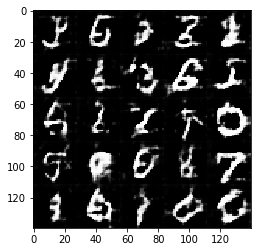

Epoch 1/2... Discriminator Loss: 1.0175... Generator Loss: 1.6424
Epoch 1/2... Discriminator Loss: 1.2224... Generator Loss: 0.5514
Epoch 1/2... Discriminator Loss: 1.7457... Generator Loss: 0.2420
Epoch 1/2... Discriminator Loss: 1.3785... Generator Loss: 0.3898
Epoch 1/2... Discriminator Loss: 0.8422... Generator Loss: 1.3288
Epoch 1/2... Discriminator Loss: 1.1435... Generator Loss: 1.1768
Epoch 1/2... Discriminator Loss: 1.1194... Generator Loss: 0.7821
Epoch 1/2... Discriminator Loss: 0.8374... Generator Loss: 1.4119
Epoch 1/2... Discriminator Loss: 0.9282... Generator Loss: 0.7956
Epoch 1/2... Discriminator Loss: 0.7699... Generator Loss: 1.3940


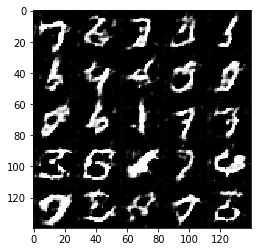

Epoch 1/2... Discriminator Loss: 1.2058... Generator Loss: 0.5393
Epoch 1/2... Discriminator Loss: 1.0234... Generator Loss: 0.7810
Epoch 1/2... Discriminator Loss: 1.5336... Generator Loss: 0.3197
Epoch 1/2... Discriminator Loss: 1.2675... Generator Loss: 0.5035
Epoch 1/2... Discriminator Loss: 0.7959... Generator Loss: 0.9678
Epoch 1/2... Discriminator Loss: 0.6121... Generator Loss: 1.3801
Epoch 1/2... Discriminator Loss: 0.9035... Generator Loss: 0.6823
Epoch 1/2... Discriminator Loss: 1.0975... Generator Loss: 2.9566
Epoch 1/2... Discriminator Loss: 1.2819... Generator Loss: 0.5273
Epoch 1/2... Discriminator Loss: 1.7189... Generator Loss: 0.5534


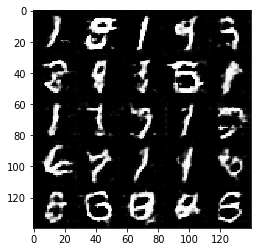

Epoch 1/2... Discriminator Loss: 1.9031... Generator Loss: 0.2460
Epoch 1/2... Discriminator Loss: 1.0490... Generator Loss: 1.9475
Epoch 1/2... Discriminator Loss: 0.9586... Generator Loss: 0.8477
Epoch 1/2... Discriminator Loss: 1.7054... Generator Loss: 0.2799
Epoch 1/2... Discriminator Loss: 1.7725... Generator Loss: 0.2575
Epoch 1/2... Discriminator Loss: 0.8580... Generator Loss: 1.7567
Epoch 1/2... Discriminator Loss: 1.4248... Generator Loss: 1.3256
Epoch 1/2... Discriminator Loss: 1.1659... Generator Loss: 0.5185
Epoch 1/2... Discriminator Loss: 1.1480... Generator Loss: 0.5212
Epoch 1/2... Discriminator Loss: 1.0148... Generator Loss: 1.0725


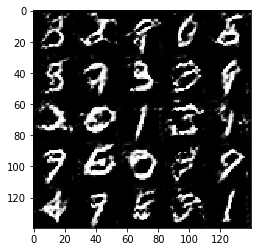

Epoch 1/2... Discriminator Loss: 1.0290... Generator Loss: 0.9770
Epoch 1/2... Discriminator Loss: 1.3241... Generator Loss: 2.3014
Epoch 1/2... Discriminator Loss: 1.4980... Generator Loss: 0.4736
Epoch 1/2... Discriminator Loss: 0.9889... Generator Loss: 1.0046
Epoch 1/2... Discriminator Loss: 0.8991... Generator Loss: 0.7059
Epoch 1/2... Discriminator Loss: 0.7510... Generator Loss: 1.2459
Epoch 1/2... Discriminator Loss: 0.8420... Generator Loss: 1.0553
Epoch 1/2... Discriminator Loss: 1.2110... Generator Loss: 0.4705
Epoch 1/2... Discriminator Loss: 1.2671... Generator Loss: 0.7930
Epoch 1/2... Discriminator Loss: 1.2219... Generator Loss: 0.5338


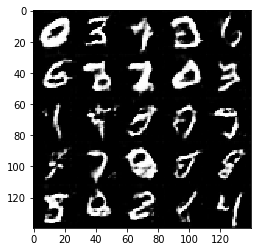

Epoch 1/2... Discriminator Loss: 1.8310... Generator Loss: 0.2276
Epoch 1/2... Discriminator Loss: 0.9372... Generator Loss: 0.9349
Epoch 1/2... Discriminator Loss: 2.4860... Generator Loss: 0.1238
Epoch 2/2... Discriminator Loss: 0.8288... Generator Loss: 1.2381
Epoch 2/2... Discriminator Loss: 1.0483... Generator Loss: 0.5849
Epoch 2/2... Discriminator Loss: 1.2905... Generator Loss: 0.5872
Epoch 2/2... Discriminator Loss: 0.8658... Generator Loss: 0.7925
Epoch 2/2... Discriminator Loss: 1.3640... Generator Loss: 0.4635
Epoch 2/2... Discriminator Loss: 1.7996... Generator Loss: 0.2624
Epoch 2/2... Discriminator Loss: 0.7236... Generator Loss: 0.9353


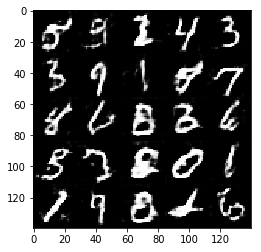

Epoch 2/2... Discriminator Loss: 0.9779... Generator Loss: 0.7704
Epoch 2/2... Discriminator Loss: 1.8932... Generator Loss: 0.2446
Epoch 2/2... Discriminator Loss: 1.3306... Generator Loss: 0.3916
Epoch 2/2... Discriminator Loss: 0.7843... Generator Loss: 0.7098
Epoch 2/2... Discriminator Loss: 1.3447... Generator Loss: 0.4343
Epoch 2/2... Discriminator Loss: 1.6163... Generator Loss: 0.3753
Epoch 2/2... Discriminator Loss: 1.0931... Generator Loss: 1.6714
Epoch 2/2... Discriminator Loss: 0.7255... Generator Loss: 0.9303
Epoch 2/2... Discriminator Loss: 1.5215... Generator Loss: 0.4384
Epoch 2/2... Discriminator Loss: 1.0249... Generator Loss: 2.3243


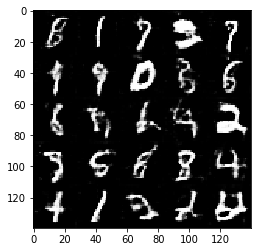

Epoch 2/2... Discriminator Loss: 0.6694... Generator Loss: 1.1460
Epoch 2/2... Discriminator Loss: 1.9726... Generator Loss: 0.3205
Epoch 2/2... Discriminator Loss: 0.8224... Generator Loss: 2.0461
Epoch 2/2... Discriminator Loss: 1.8071... Generator Loss: 0.2849
Epoch 2/2... Discriminator Loss: 1.2115... Generator Loss: 0.4695
Epoch 2/2... Discriminator Loss: 1.1966... Generator Loss: 0.5045
Epoch 2/2... Discriminator Loss: 1.5660... Generator Loss: 1.2757
Epoch 2/2... Discriminator Loss: 1.5157... Generator Loss: 0.4708
Epoch 2/2... Discriminator Loss: 1.0300... Generator Loss: 1.0388
Epoch 2/2... Discriminator Loss: 1.0465... Generator Loss: 0.6332


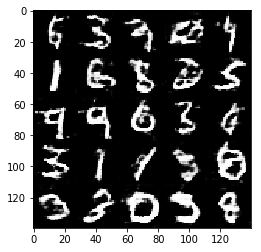

Epoch 2/2... Discriminator Loss: 1.0332... Generator Loss: 0.6185
Epoch 2/2... Discriminator Loss: 1.4331... Generator Loss: 0.4900
Epoch 2/2... Discriminator Loss: 0.8363... Generator Loss: 0.7671
Epoch 2/2... Discriminator Loss: 1.1736... Generator Loss: 0.4799
Epoch 2/2... Discriminator Loss: 1.1423... Generator Loss: 0.4976
Epoch 2/2... Discriminator Loss: 2.3854... Generator Loss: 0.1273
Epoch 2/2... Discriminator Loss: 1.2425... Generator Loss: 0.4457
Epoch 2/2... Discriminator Loss: 1.9007... Generator Loss: 0.2095
Epoch 2/2... Discriminator Loss: 0.6723... Generator Loss: 1.2573
Epoch 2/2... Discriminator Loss: 1.2337... Generator Loss: 0.6671


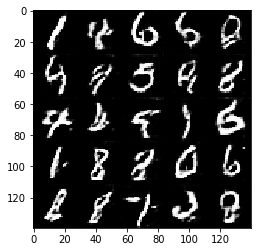

Epoch 2/2... Discriminator Loss: 0.8240... Generator Loss: 0.8880
Epoch 2/2... Discriminator Loss: 2.7754... Generator Loss: 0.0820
Epoch 2/2... Discriminator Loss: 0.9975... Generator Loss: 0.9485
Epoch 2/2... Discriminator Loss: 2.8993... Generator Loss: 3.6926
Epoch 2/2... Discriminator Loss: 1.0786... Generator Loss: 0.5994
Epoch 2/2... Discriminator Loss: 1.2114... Generator Loss: 0.4759
Epoch 2/2... Discriminator Loss: 0.6699... Generator Loss: 0.9976
Epoch 2/2... Discriminator Loss: 0.7437... Generator Loss: 1.1378
Epoch 2/2... Discriminator Loss: 1.0178... Generator Loss: 0.6263
Epoch 2/2... Discriminator Loss: 2.1998... Generator Loss: 0.1729


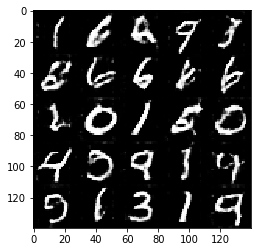

Epoch 2/2... Discriminator Loss: 1.3930... Generator Loss: 0.3662
Epoch 2/2... Discriminator Loss: 0.5066... Generator Loss: 1.3694
Epoch 2/2... Discriminator Loss: 1.0490... Generator Loss: 0.7365
Epoch 2/2... Discriminator Loss: 1.2550... Generator Loss: 1.2947
Epoch 2/2... Discriminator Loss: 1.1200... Generator Loss: 2.0615
Epoch 2/2... Discriminator Loss: 1.4680... Generator Loss: 0.3529
Epoch 2/2... Discriminator Loss: 0.4771... Generator Loss: 1.4047
Epoch 2/2... Discriminator Loss: 0.7134... Generator Loss: 0.9368
Epoch 2/2... Discriminator Loss: 3.3157... Generator Loss: 0.0474
Epoch 2/2... Discriminator Loss: 1.2356... Generator Loss: 0.9091


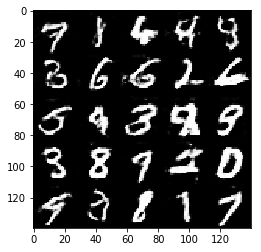

Epoch 2/2... Discriminator Loss: 0.6339... Generator Loss: 1.1153
Epoch 2/2... Discriminator Loss: 1.6594... Generator Loss: 0.2710
Epoch 2/2... Discriminator Loss: 1.9689... Generator Loss: 0.2654
Epoch 2/2... Discriminator Loss: 0.6797... Generator Loss: 1.5298
Epoch 2/2... Discriminator Loss: 0.9135... Generator Loss: 0.8425
Epoch 2/2... Discriminator Loss: 1.4423... Generator Loss: 0.3636
Epoch 2/2... Discriminator Loss: 1.4765... Generator Loss: 0.3272
Epoch 2/2... Discriminator Loss: 1.6652... Generator Loss: 0.2703
Epoch 2/2... Discriminator Loss: 1.5893... Generator Loss: 1.4735
Epoch 2/2... Discriminator Loss: 1.3474... Generator Loss: 1.9301


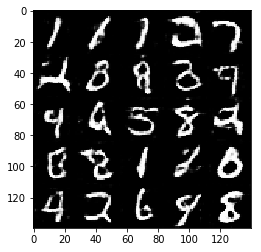

Epoch 2/2... Discriminator Loss: 0.9932... Generator Loss: 1.4879
Epoch 2/2... Discriminator Loss: 1.7936... Generator Loss: 0.2371
Epoch 2/2... Discriminator Loss: 0.9910... Generator Loss: 0.7374
Epoch 2/2... Discriminator Loss: 1.4011... Generator Loss: 0.4849
Epoch 2/2... Discriminator Loss: 0.7087... Generator Loss: 1.1920
Epoch 2/2... Discriminator Loss: 1.5655... Generator Loss: 0.2972
Epoch 2/2... Discriminator Loss: 1.8084... Generator Loss: 0.2644
Epoch 2/2... Discriminator Loss: 1.8241... Generator Loss: 0.2612
Epoch 2/2... Discriminator Loss: 0.5798... Generator Loss: 1.3396
Epoch 2/2... Discriminator Loss: 0.8534... Generator Loss: 0.7248


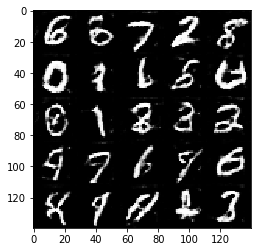

Epoch 2/2... Discriminator Loss: 1.8213... Generator Loss: 0.2272
Epoch 2/2... Discriminator Loss: 1.2091... Generator Loss: 0.5102
Epoch 2/2... Discriminator Loss: 1.1010... Generator Loss: 2.5680
Epoch 2/2... Discriminator Loss: 0.7397... Generator Loss: 1.2866
Epoch 2/2... Discriminator Loss: 2.1997... Generator Loss: 0.1722
Epoch 2/2... Discriminator Loss: 1.1140... Generator Loss: 0.7488
Epoch 2/2... Discriminator Loss: 1.6556... Generator Loss: 0.2865
Epoch 2/2... Discriminator Loss: 0.7003... Generator Loss: 1.7394
Epoch 2/2... Discriminator Loss: 0.9032... Generator Loss: 2.2242
Epoch 2/2... Discriminator Loss: 1.1140... Generator Loss: 0.5124


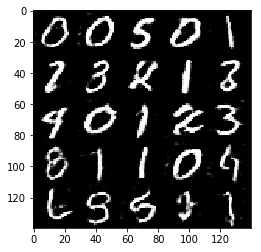

Epoch 2/2... Discriminator Loss: 1.0899... Generator Loss: 0.5175
Epoch 2/2... Discriminator Loss: 1.2681... Generator Loss: 0.4394
Epoch 2/2... Discriminator Loss: 1.0201... Generator Loss: 0.8235
Epoch 2/2... Discriminator Loss: 2.2213... Generator Loss: 0.2792
Epoch 2/2... Discriminator Loss: 1.1209... Generator Loss: 0.8606
Epoch 2/2... Discriminator Loss: 1.2527... Generator Loss: 0.4852
Epoch 2/2... Discriminator Loss: 2.5499... Generator Loss: 0.1512


In [18]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

In [19]:
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
mnist_dataset.shape[3]

1

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.1161... Generator Loss: 0.1599
Epoch 1/1... Discriminator Loss: 0.7632... Generator Loss: 2.4597
Epoch 1/1... Discriminator Loss: 0.8042... Generator Loss: 1.2112
Epoch 1/1... Discriminator Loss: 1.4144... Generator Loss: 0.5824
Epoch 1/1... Discriminator Loss: 0.5160... Generator Loss: 1.7978
Epoch 1/1... Discriminator Loss: 0.7383... Generator Loss: 1.4623
Epoch 1/1... Discriminator Loss: 0.9173... Generator Loss: 1.1320
Epoch 1/1... Discriminator Loss: 0.7942... Generator Loss: 1.5371
Epoch 1/1... Discriminator Loss: 1.3051... Generator Loss: 0.9151
Epoch 1/1... Discriminator Loss: 1.3926... Generator Loss: 1.7935


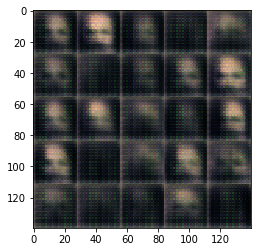

Epoch 1/1... Discriminator Loss: 0.9637... Generator Loss: 0.9808
Epoch 1/1... Discriminator Loss: 1.2494... Generator Loss: 1.6653
Epoch 1/1... Discriminator Loss: 1.2619... Generator Loss: 0.5417
Epoch 1/1... Discriminator Loss: 1.3490... Generator Loss: 0.7374
Epoch 1/1... Discriminator Loss: 1.3134... Generator Loss: 0.8277
Epoch 1/1... Discriminator Loss: 1.2098... Generator Loss: 2.3189
Epoch 1/1... Discriminator Loss: 1.6251... Generator Loss: 0.3552
Epoch 1/1... Discriminator Loss: 0.8375... Generator Loss: 1.6809
Epoch 1/1... Discriminator Loss: 0.8042... Generator Loss: 1.1201
Epoch 1/1... Discriminator Loss: 0.8715... Generator Loss: 1.2408


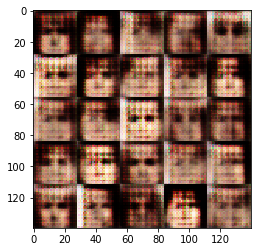

Epoch 1/1... Discriminator Loss: 1.3378... Generator Loss: 2.9894
Epoch 1/1... Discriminator Loss: 1.1572... Generator Loss: 0.9637
Epoch 1/1... Discriminator Loss: 0.6146... Generator Loss: 1.3031
Epoch 1/1... Discriminator Loss: 1.0858... Generator Loss: 1.3140
Epoch 1/1... Discriminator Loss: 0.8708... Generator Loss: 1.4083
Epoch 1/1... Discriminator Loss: 1.6452... Generator Loss: 0.3394
Epoch 1/1... Discriminator Loss: 1.0863... Generator Loss: 1.4891
Epoch 1/1... Discriminator Loss: 0.8550... Generator Loss: 0.9777
Epoch 1/1... Discriminator Loss: 0.9784... Generator Loss: 1.2018
Epoch 1/1... Discriminator Loss: 1.1019... Generator Loss: 1.1351


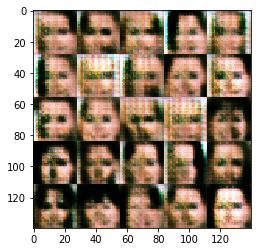

Epoch 1/1... Discriminator Loss: 1.3261... Generator Loss: 2.8752
Epoch 1/1... Discriminator Loss: 0.8794... Generator Loss: 1.1132
Epoch 1/1... Discriminator Loss: 0.8047... Generator Loss: 1.1253
Epoch 1/1... Discriminator Loss: 1.1399... Generator Loss: 0.6425
Epoch 1/1... Discriminator Loss: 0.9182... Generator Loss: 1.1573
Epoch 1/1... Discriminator Loss: 1.3540... Generator Loss: 2.0191
Epoch 1/1... Discriminator Loss: 1.0802... Generator Loss: 0.9646
Epoch 1/1... Discriminator Loss: 0.7286... Generator Loss: 1.4071
Epoch 1/1... Discriminator Loss: 0.9271... Generator Loss: 1.0498
Epoch 1/1... Discriminator Loss: 0.9010... Generator Loss: 0.9046


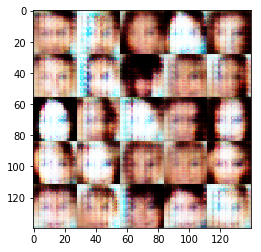

Epoch 1/1... Discriminator Loss: 0.9369... Generator Loss: 1.1620
Epoch 1/1... Discriminator Loss: 0.9395... Generator Loss: 1.2410
Epoch 1/1... Discriminator Loss: 1.3713... Generator Loss: 0.7456
Epoch 1/1... Discriminator Loss: 0.9893... Generator Loss: 1.4859
Epoch 1/1... Discriminator Loss: 1.2348... Generator Loss: 1.0903
Epoch 1/1... Discriminator Loss: 1.0631... Generator Loss: 1.5385
Epoch 1/1... Discriminator Loss: 0.8111... Generator Loss: 1.0087
Epoch 1/1... Discriminator Loss: 0.9861... Generator Loss: 1.7891
Epoch 1/1... Discriminator Loss: 0.8639... Generator Loss: 1.0599
Epoch 1/1... Discriminator Loss: 1.7434... Generator Loss: 0.2878


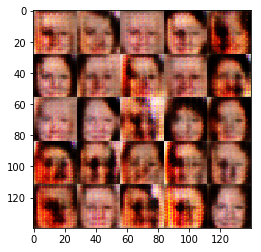

Epoch 1/1... Discriminator Loss: 1.6849... Generator Loss: 0.7477
Epoch 1/1... Discriminator Loss: 1.3614... Generator Loss: 0.7824
Epoch 1/1... Discriminator Loss: 1.2831... Generator Loss: 0.7089
Epoch 1/1... Discriminator Loss: 1.4454... Generator Loss: 0.3901
Epoch 1/1... Discriminator Loss: 1.3514... Generator Loss: 0.5672
Epoch 1/1... Discriminator Loss: 1.1210... Generator Loss: 1.0602
Epoch 1/1... Discriminator Loss: 0.7409... Generator Loss: 1.2369
Epoch 1/1... Discriminator Loss: 0.7822... Generator Loss: 1.5049
Epoch 1/1... Discriminator Loss: 0.8014... Generator Loss: 1.0953
Epoch 1/1... Discriminator Loss: 1.0990... Generator Loss: 0.7254


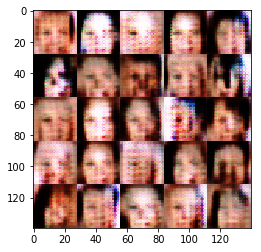

Epoch 1/1... Discriminator Loss: 1.1537... Generator Loss: 0.6767
Epoch 1/1... Discriminator Loss: 0.9687... Generator Loss: 1.0000
Epoch 1/1... Discriminator Loss: 1.1521... Generator Loss: 1.3899
Epoch 1/1... Discriminator Loss: 1.0236... Generator Loss: 1.3076
Epoch 1/1... Discriminator Loss: 0.8778... Generator Loss: 0.9965
Epoch 1/1... Discriminator Loss: 1.0050... Generator Loss: 0.8516
Epoch 1/1... Discriminator Loss: 0.8879... Generator Loss: 1.2770
Epoch 1/1... Discriminator Loss: 1.1160... Generator Loss: 0.7400
Epoch 1/1... Discriminator Loss: 1.4726... Generator Loss: 0.4737
Epoch 1/1... Discriminator Loss: 1.2371... Generator Loss: 1.7938


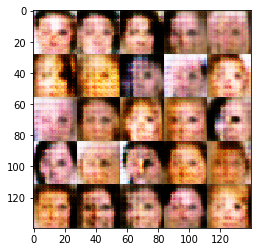

Epoch 1/1... Discriminator Loss: 1.6993... Generator Loss: 2.4558
Epoch 1/1... Discriminator Loss: 1.0457... Generator Loss: 0.8736
Epoch 1/1... Discriminator Loss: 1.5229... Generator Loss: 0.4500
Epoch 1/1... Discriminator Loss: 0.8725... Generator Loss: 1.1472
Epoch 1/1... Discriminator Loss: 0.8776... Generator Loss: 1.0158
Epoch 1/1... Discriminator Loss: 0.9908... Generator Loss: 0.8307
Epoch 1/1... Discriminator Loss: 1.1675... Generator Loss: 1.0948
Epoch 1/1... Discriminator Loss: 0.9909... Generator Loss: 2.5262
Epoch 1/1... Discriminator Loss: 1.0749... Generator Loss: 0.8236
Epoch 1/1... Discriminator Loss: 1.2111... Generator Loss: 0.6149


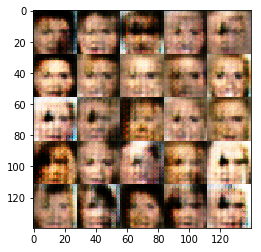

Epoch 1/1... Discriminator Loss: 1.3120... Generator Loss: 0.5295
Epoch 1/1... Discriminator Loss: 1.0571... Generator Loss: 0.8893
Epoch 1/1... Discriminator Loss: 0.9542... Generator Loss: 0.6780
Epoch 1/1... Discriminator Loss: 0.6376... Generator Loss: 1.3947
Epoch 1/1... Discriminator Loss: 1.6242... Generator Loss: 3.5297
Epoch 1/1... Discriminator Loss: 1.0446... Generator Loss: 1.1040
Epoch 1/1... Discriminator Loss: 1.0528... Generator Loss: 0.8207
Epoch 1/1... Discriminator Loss: 1.7726... Generator Loss: 2.1746
Epoch 1/1... Discriminator Loss: 1.2154... Generator Loss: 0.6549
Epoch 1/1... Discriminator Loss: 0.9552... Generator Loss: 0.9492


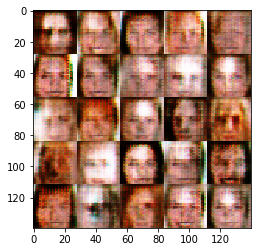

Epoch 1/1... Discriminator Loss: 0.8907... Generator Loss: 2.2574
Epoch 1/1... Discriminator Loss: 1.6033... Generator Loss: 0.3751
Epoch 1/1... Discriminator Loss: 1.4707... Generator Loss: 0.4193
Epoch 1/1... Discriminator Loss: 0.7130... Generator Loss: 1.2312
Epoch 1/1... Discriminator Loss: 0.8923... Generator Loss: 0.7901
Epoch 1/1... Discriminator Loss: 0.8645... Generator Loss: 0.7967
Epoch 1/1... Discriminator Loss: 1.4509... Generator Loss: 0.4171
Epoch 1/1... Discriminator Loss: 0.9521... Generator Loss: 0.7732
Epoch 1/1... Discriminator Loss: 0.9155... Generator Loss: 0.7867
Epoch 1/1... Discriminator Loss: 1.0833... Generator Loss: 0.7004


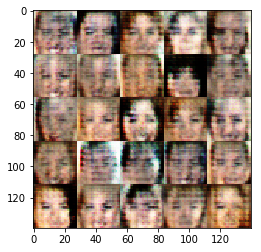

Epoch 1/1... Discriminator Loss: 1.0137... Generator Loss: 0.6914
Epoch 1/1... Discriminator Loss: 0.8753... Generator Loss: 1.8810
Epoch 1/1... Discriminator Loss: 0.5844... Generator Loss: 1.4810
Epoch 1/1... Discriminator Loss: 0.6904... Generator Loss: 1.4059
Epoch 1/1... Discriminator Loss: 0.9035... Generator Loss: 1.3102
Epoch 1/1... Discriminator Loss: 0.9387... Generator Loss: 0.9395
Epoch 1/1... Discriminator Loss: 0.9893... Generator Loss: 1.3757
Epoch 1/1... Discriminator Loss: 0.9856... Generator Loss: 0.9302
Epoch 1/1... Discriminator Loss: 1.1369... Generator Loss: 0.6816
Epoch 1/1... Discriminator Loss: 1.8149... Generator Loss: 0.2824


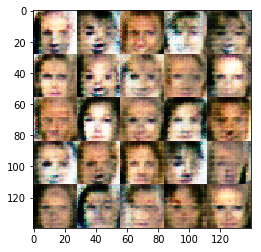

Epoch 1/1... Discriminator Loss: 1.4335... Generator Loss: 0.4065
Epoch 1/1... Discriminator Loss: 1.0209... Generator Loss: 0.7315
Epoch 1/1... Discriminator Loss: 1.0963... Generator Loss: 0.7395
Epoch 1/1... Discriminator Loss: 1.1912... Generator Loss: 0.6935
Epoch 1/1... Discriminator Loss: 1.1121... Generator Loss: 1.1421
Epoch 1/1... Discriminator Loss: 1.4872... Generator Loss: 0.3152
Epoch 1/1... Discriminator Loss: 0.9776... Generator Loss: 0.8467
Epoch 1/1... Discriminator Loss: 0.7999... Generator Loss: 1.3505
Epoch 1/1... Discriminator Loss: 1.5283... Generator Loss: 0.3750
Epoch 1/1... Discriminator Loss: 1.1745... Generator Loss: 0.5731


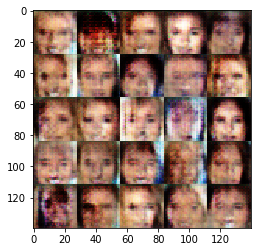

Epoch 1/1... Discriminator Loss: 1.0146... Generator Loss: 0.7480
Epoch 1/1... Discriminator Loss: 0.6994... Generator Loss: 1.2075
Epoch 1/1... Discriminator Loss: 1.0134... Generator Loss: 1.1073
Epoch 1/1... Discriminator Loss: 0.9546... Generator Loss: 1.0405
Epoch 1/1... Discriminator Loss: 0.9353... Generator Loss: 0.7903
Epoch 1/1... Discriminator Loss: 0.9427... Generator Loss: 1.3145
Epoch 1/1... Discriminator Loss: 0.8234... Generator Loss: 0.9469
Epoch 1/1... Discriminator Loss: 1.0408... Generator Loss: 1.5391
Epoch 1/1... Discriminator Loss: 0.9583... Generator Loss: 1.5261
Epoch 1/1... Discriminator Loss: 0.8201... Generator Loss: 1.3639


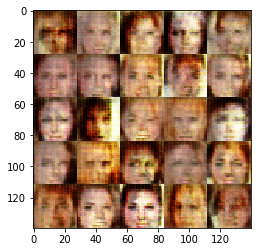

Epoch 1/1... Discriminator Loss: 1.0207... Generator Loss: 0.7823
Epoch 1/1... Discriminator Loss: 1.0737... Generator Loss: 1.2373
Epoch 1/1... Discriminator Loss: 0.9383... Generator Loss: 0.9442
Epoch 1/1... Discriminator Loss: 1.1732... Generator Loss: 0.5635
Epoch 1/1... Discriminator Loss: 0.8774... Generator Loss: 0.9375
Epoch 1/1... Discriminator Loss: 1.5244... Generator Loss: 0.3433
Epoch 1/1... Discriminator Loss: 0.9325... Generator Loss: 0.9757
Epoch 1/1... Discriminator Loss: 0.9754... Generator Loss: 0.8988
Epoch 1/1... Discriminator Loss: 0.8665... Generator Loss: 2.2306
Epoch 1/1... Discriminator Loss: 0.9804... Generator Loss: 1.1958


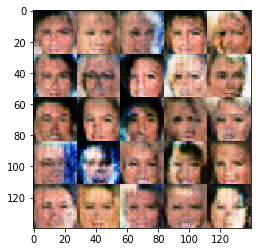

Epoch 1/1... Discriminator Loss: 0.9604... Generator Loss: 0.7941
Epoch 1/1... Discriminator Loss: 1.0464... Generator Loss: 1.0025
Epoch 1/1... Discriminator Loss: 1.5231... Generator Loss: 0.3379
Epoch 1/1... Discriminator Loss: 1.0159... Generator Loss: 0.8674
Epoch 1/1... Discriminator Loss: 1.0009... Generator Loss: 0.8274
Epoch 1/1... Discriminator Loss: 0.8155... Generator Loss: 1.3417
Epoch 1/1... Discriminator Loss: 1.0805... Generator Loss: 1.0392
Epoch 1/1... Discriminator Loss: 0.9807... Generator Loss: 0.8717
Epoch 1/1... Discriminator Loss: 0.9058... Generator Loss: 1.4554
Epoch 1/1... Discriminator Loss: 1.1840... Generator Loss: 1.1739


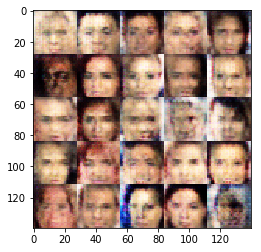

Epoch 1/1... Discriminator Loss: 0.8819... Generator Loss: 1.1211
Epoch 1/1... Discriminator Loss: 0.9894... Generator Loss: 1.2725
Epoch 1/1... Discriminator Loss: 1.6781... Generator Loss: 0.3353
Epoch 1/1... Discriminator Loss: 0.9911... Generator Loss: 1.0131
Epoch 1/1... Discriminator Loss: 0.9795... Generator Loss: 1.0430
Epoch 1/1... Discriminator Loss: 1.2896... Generator Loss: 0.6323
Epoch 1/1... Discriminator Loss: 1.0066... Generator Loss: 0.9431
Epoch 1/1... Discriminator Loss: 0.7591... Generator Loss: 1.3880


In [22]:
batch_size = 128
z_dim = 128
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.